In [86]:
# environment set up
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import time
import ast
from scipy import stats as st

In [87]:
spectrum_len = 500 # automate this

parent_dir = os.environ['PWD']
data_dir = os.environ['DATA_DIR']
stddata_path = os.path.join(data_dir, "StdData-" + str(spectrum_len))

os.chdir(os.path.join(parent_dir, "lab-notebook", "smunukutla"))

In [88]:
data = pd.read_csv("data.csv", sep=",")
record_nums = data.iloc[0, :].tolist()
spectrum_names = data.iloc[1, :].tolist()
y = data.iloc[2, :].astype(int).tolist()
y = np.reshape(y, (len(y), 1))
num_samples = len(y)

In [89]:
num_samples

166

In [90]:
data

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,00108,00114,00120,00124,00130,00142,00148,00154,00158,00177,...,10896,10917,10938,10946,10967,10988,11009,11030,11051,11072
1,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,...,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz
2,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0


In [91]:
spectra = np.zeros((num_samples,spectrum_len))
wavelengths = np.zeros((1,spectrum_len))

In [92]:
for i in range(len(record_nums)):
    data = pd.read_csv(os.path.join(stddata_path,"{}.csv".format(record_nums[i])))
    if i == 0:
        wavelengths[i,:] = data.iloc[:, 0].to_numpy()
    spectra[i,:] = data.iloc[:, 1].to_numpy()

In [93]:
type(spectra)

numpy.ndarray

In [94]:
y_cat = to_categorical(y)

In [95]:
data.head(5)

,wavelength,reflectance
0,0.370000,0.878464
1,0.374269,0.878143
2,0.378537,0.875394
3,0.382806,0.877019
4,0.387074,0.878757


In [96]:
spectra.shape

(166, 500)

In [97]:
spectra

array([[0.36625177, 0.37408954, 0.38041823, ..., 0.69747148, 0.69613203,
        0.69590056],
       [0.22933248, 0.23542408, 0.24072858, ..., 0.57995432, 0.57845447,
        0.58057582],
       [0.10552621, 0.10864627, 0.11163579, ..., 0.3127732 , 0.31293405,
        0.31438494],
       ...,
       [0.84827669, 0.8483359 , 0.84993451, ..., 0.73254605, 0.72484708,
        0.71382553],
       [0.88008486, 0.88482508, 0.88539167, ..., 0.75476558, 0.74785095,
        0.7386977 ],
       [0.87846376, 0.87814294, 0.87539409, ..., 0.7541015 , 0.74652251,
        0.73594507]])

In [98]:
y_cat = to_categorical(y)

In [99]:
from sklearn.decomposition import DictionaryLearning

In [100]:
model = DictionaryLearning(n_components=10, alpha=1, verbose=True)

In [101]:
atoms = model.fit_transform(spectra)

[dict_learning] .+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+


In [102]:
atoms.shape

(166, 10)

In [103]:
print(atoms)

[[-1.17884132e+01  2.32420079e-01 -2.60517183e+00 ... -1.65090195e+00
   4.01075341e-01 -7.25813368e-03]
 [-7.29529135e+00  1.54965482e-01 -6.43442354e+00 ... -2.01258144e+00
   4.78536210e-01 -1.46621317e-02]
 [ 7.37385252e-02  3.62634057e-01 -8.00459328e+00 ... -6.28602988e-01
  -2.48872353e-02 -8.39894660e-03]
 ...
 [-1.29424358e+01 -7.55798880e-01 -1.05650292e+00 ...  1.01927988e+01
  -2.04191317e-01  7.49543370e-03]
 [-1.35125463e+01 -1.03477898e+00 -1.11022537e+00 ...  9.80525977e+00
  -7.76125078e-01 -2.84531334e-04]
 [-1.32707608e+01 -5.78728410e-01  2.08631576e-01 ...  9.78776857e+00
   1.23607928e-01  1.66371782e-02]]


In [104]:
model2 = DictionaryLearning(n_components=10, alpha=1, transform_algorithm='threshold', verbose=True)

In [105]:
atoms2 = model2.fit_transform(spectra)

[dict_learning] .+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+


In [106]:
atoms2.shape

(166, 10)

In [107]:
print(atoms2)

[[-13.96702235  11.76187847 -13.5262892  ...  13.69659925  12.32970097
   -0.        ]
 [-12.00684005   9.64230327 -12.25027701 ...  11.72398555  11.13384119
    0.        ]
 [ -6.9408455    5.19291353  -7.63619502 ...   6.77768826   6.81191958
    0.        ]
 ...
 [-19.67534109  17.7134846  -18.04453112 ...  19.60979497  16.09787098
   -0.        ]
 [-19.71066981  17.72580689 -18.03078169 ...  19.63619482  16.14339974
   -0.        ]
 [-20.3672688   18.42861286 -18.60715792 ...  20.31026363  16.59028884
   -0.        ]]


In [108]:
model.get_params()

{'alpha': 1,
 'code_init': None,
 'dict_init': None,
 'fit_algorithm': 'lars',
 'max_iter': 1000,
 'n_components': 10,
 'n_jobs': None,
 'positive_code': False,
 'positive_dict': False,
 'random_state': None,
 'split_sign': False,
 'tol': 1e-08,
 'transform_algorithm': 'omp',
 'transform_alpha': None,
 'transform_n_nonzero_coefs': None,
 'verbose': True}

In [109]:
print(model.components_)

[[-0.03576344 -0.03586424 -0.03608334 ... -0.04367278 -0.04356272
  -0.04343269]
 [ 0.02333185  0.02426826  0.02531973 ...  0.0048098   0.0045162
   0.00414729]
 [-0.01466709 -0.01506379 -0.01531206 ... -0.03734992 -0.03729115
  -0.03741644]
 ...
 [ 0.04298044  0.0432337   0.04325401 ...  0.02180551  0.02105525
   0.02026596]
 [ 0.00781883  0.00835778  0.00902266 ...  0.06802284  0.06813333
   0.06787213]
 [-0.03182379 -0.03162639  0.04344017 ... -0.02905633 -0.05442185
   0.08196619]]


In [110]:
model.components_.shape

(10, 500)

In [111]:
print(model2.components_)

[[-0.03576344 -0.03586424 -0.03608334 ... -0.04367278 -0.04356272
  -0.04343269]
 [ 0.02333185  0.02426826  0.02531973 ...  0.0048098   0.0045162
   0.00414729]
 [-0.01466709 -0.01506379 -0.01531206 ... -0.03734992 -0.03729115
  -0.03741644]
 ...
 [ 0.04298044  0.0432337   0.04325401 ...  0.02180551  0.02105525
   0.02026596]
 [ 0.00781883  0.00835778  0.00902266 ...  0.06802284  0.06813333
   0.06787213]
 [-0.0471931  -0.07783983  0.06192252 ... -0.07073107 -0.02864239
   0.09889688]]


In [112]:
model2.components_.shape

(10, 500)

approximate with the training data
run transform on the training data to find the reconstructed spectra

166 x 10 X 10 x 500

approximation of an integral

thresholding is bad to get coefficients

use max distance

take each row at a time and then take the norm of each

L2 norm / number of points

model.transform(spectra) is the same thing as atoms

In [113]:
reconstructed_spectra = atoms.dot(model.components_)

In [114]:
reconstructed_spectra

array([[0.40550162, 0.40785675, 0.41104766, ..., 0.70026909, 0.69993051,
        0.69892633],
       [0.27147791, 0.27447533, 0.27679264, ..., 0.6047778 , 0.60529683,
        0.60467358],
       [0.11456153, 0.11836301, 0.12037575, ..., 0.32340793, 0.32325094,
        0.32358448],
       ...,
       [0.83103883, 0.83245797, 0.83335574, ..., 0.72732652, 0.71750587,
        0.70843045],
       [0.85167042, 0.85321244, 0.85367602, ..., 0.74411888, 0.73486882,
        0.72521108],
       [0.84573788, 0.84800093, 0.85080536, ..., 0.75161639, 0.74231126,
        0.73500805]])

In [115]:
reconstructed_spectra.shape

(166, 500)

In [116]:
distances = []
for i in range(len(spectra)):
    distances.append(np.linalg.norm(spectra[i] - reconstructed_spectra[i]))

In [132]:
distances

[0.18240011170537185,
 0.23261109633068944,
 0.1779214112877328,
 0.14636382943374743,
 0.13785020675670717,
 0.2020514386315465,
 0.1776210340922693,
 0.11576809385760044,
 0.08826682158645958,
 0.19627480509188222,
 0.22030692183059272,
 0.3165936398103684,
 0.2950619779672156,
 0.19420066690119234,
 0.2044226949990903,
 0.3096985074252645,
 0.12287789076319482,
 0.1682531996900577,
 0.18496811116977094,
 0.28648336679831493,
 0.38045858270909433,
 0.11247284075537063,
 0.13124529179193614,
 0.1777163996683096,
 0.13473061697130578,
 0.30301435744387173,
 0.7155707700300002,
 0.09396680321560942,
 0.31262611132792434,
 0.339047097436678,
 0.31855986611389414,
 0.3815841569265085,
 0.2434202970261837,
 0.6043581665038747,
 0.48469140363257907,
 0.7654328599897003,
 0.30981486943636544,
 0.3626251101982086,
 0.40639038819248113,
 0.22123912797702833,
 0.14252610397772641,
 0.1736975473767143,
 0.4601368399046435,
 0.3256476022072112,
 0.5412737197275255,
 0.6707413874274938,
 0.1278907

In [118]:
reconstructed_spectra2 = atoms2.dot(model2.components_)

In [119]:
distances2 = []
for i in range(len(spectra)):
    distances2.append(np.linalg.norm(spectra[i] - reconstructed_spectra2[i]))

In [120]:
distances2

[99.49666756146343,
 86.99262510524409,
 51.25454028277164,
 55.414283894866465,
 35.72592591820711,
 91.98585435446586,
 80.08006575331812,
 49.97989271540941,
 50.84736167617028,
 33.00295128641088,
 118.66948307329083,
 114.39069689424743,
 58.05390903664985,
 65.96289280280932,
 34.468772305531246,
 92.12856039674801,
 128.56157180976996,
 128.4955347163163,
 131.65847647314695,
 120.00535671897134,
 95.30120247462867,
 100.95776331753011,
 125.82639582195888,
 128.43814836131588,
 113.42391968435071,
 102.23761942035404,
 67.7833906253574,
 134.6102490567154,
 130.60680568907947,
 127.06183109061244,
 109.38697166197521,
 104.2818221645975,
 127.09671431771332,
 110.0428039214936,
 106.85595386110786,
 110.35385058396756,
 93.68287445851921,
 114.11043682490563,
 121.89926391102266,
 74.47579908590751,
 70.97667550050983,
 74.03616143983947,
 52.26764612727498,
 52.072975369225716,
 98.06451831285023,
 113.11906330920546,
 104.35308121727772,
 89.10403762885336,
 60.8251720150301,

In [121]:
reconstructed_spectra

array([[0.40550162, 0.40785675, 0.41104766, ..., 0.70026909, 0.69993051,
        0.69892633],
       [0.27147791, 0.27447533, 0.27679264, ..., 0.6047778 , 0.60529683,
        0.60467358],
       [0.11456153, 0.11836301, 0.12037575, ..., 0.32340793, 0.32325094,
        0.32358448],
       ...,
       [0.83103883, 0.83245797, 0.83335574, ..., 0.72732652, 0.71750587,
        0.70843045],
       [0.85167042, 0.85321244, 0.85367602, ..., 0.74411888, 0.73486882,
        0.72521108],
       [0.84573788, 0.84800093, 0.85080536, ..., 0.75161639, 0.74231126,
        0.73500805]])

In [122]:
spectra

array([[0.36625177, 0.37408954, 0.38041823, ..., 0.69747148, 0.69613203,
        0.69590056],
       [0.22933248, 0.23542408, 0.24072858, ..., 0.57995432, 0.57845447,
        0.58057582],
       [0.10552621, 0.10864627, 0.11163579, ..., 0.3127732 , 0.31293405,
        0.31438494],
       ...,
       [0.84827669, 0.8483359 , 0.84993451, ..., 0.73254605, 0.72484708,
        0.71382553],
       [0.88008486, 0.88482508, 0.88539167, ..., 0.75476558, 0.74785095,
        0.7386977 ],
       [0.87846376, 0.87814294, 0.87539409, ..., 0.7541015 , 0.74652251,
        0.73594507]])

Reconstructed Spectra: 35


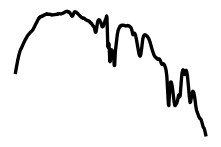

Reconstructed Spectra: 49


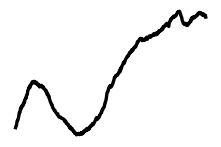

Reconstructed Spectra: 137


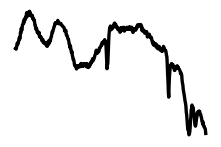

Reconstructed Spectra: 127


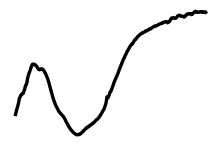

Reconstructed Spectra: 108


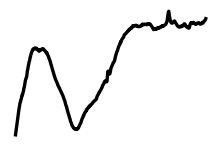

Reconstructed Spectra: 40


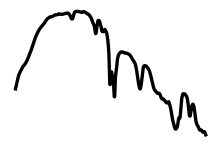

Reconstructed Spectra: 72


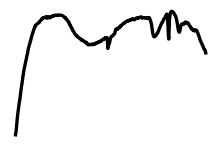

Reconstructed Spectra: 33


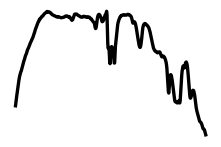

Reconstructed Spectra: 29


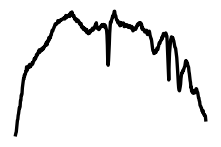

Reconstructed Spectra: 64


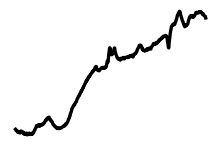

Reconstructed Spectra: 127


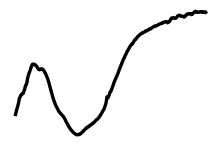

Reconstructed Spectra: 11


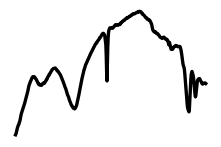

Reconstructed Spectra: 98


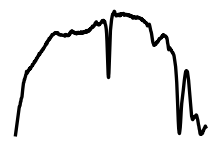

Reconstructed Spectra: 86


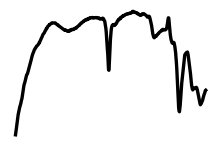

Reconstructed Spectra: 8


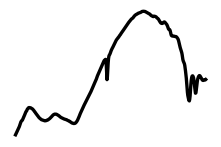

Reconstructed Spectra: 74


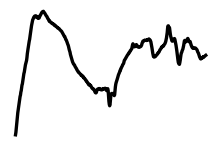

Reconstructed Spectra: 85


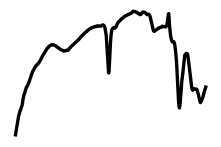

Reconstructed Spectra: 55


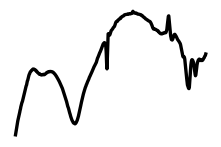

Reconstructed Spectra: 17


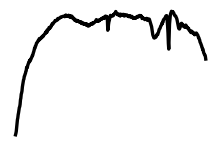

Reconstructed Spectra: 61


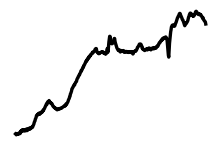

In [140]:
height = 3
width = 1.5*height
linewidth = 4
# for i in range(num_samples):
examples = 20
lst = [35, 49, 137, 127, 108, 40, 72, 33, 29, 64, 127, 11, 98, 86, 8, 74, 85, 55, 17, 61]
for index in lst:
    fig = plt.figure(figsize=(width, height), dpi=60)
    plt.plot(wavelengths[0,:], reconstructed_spectra[index,:], linewidth = linewidth, color='k')
    plt.xticks([])
    plt.yticks([])
    ax = fig.axes
    ax[0].axis('off')
    print("Reconstructed Spectra:", index)
    plt.show()
# path = os.path.join(data_dir, "plots-" + str(spectrum_len), record_nums[i] + "-" + spectrum_names[i] + ".png")
# fig.savefig(path, format = "PNG")
# plt.close(fig)